In [20]:
import networkx as nx
import helper

train_data = helper.load_data_from_file("../data/graph_data.json") # dictionary of SMILES and values are graphs

In [74]:
mol = list(train_data.keys())[55]
mol

'C[Sn](C)(C)Br'

In [75]:
graph = train_data[mol] # we want to fully connect all target nodes in this graph so message passing works

In [76]:
# get the target nodes
target_node_indices = [n for n, v in graph.nodes(data=True) if v['orbitals'][0] != -1]

In [77]:
nx.get_node_attributes(graph, 'orbitals')

{0: ['1s', -1],
 1: ['3d5/2', '4d5/2'],
 2: ['1s', -1],
 3: ['1s', -1],
 4: ['3d5/2', -1]}

In [78]:
# add NONE bonds to all target nodes
all_graphs = []

for n_i in target_node_indices: # for each target node
    graph_i = graph.copy()
    for nb_i in nx.non_neighbors(graph_i, n_i): # get all neighbors for target node
        graph_i.add_edge(n_i, nb_i, bond_type='NONE') # add edge to target node
    all_graphs.append(graph_i) # add graph to list of graphs

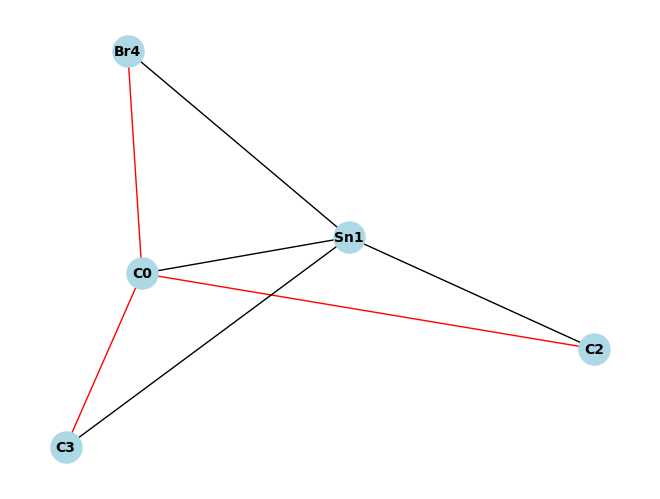

In [81]:
# Index of target node to visualize
i = 0

# Define a color map for bond types
bond_type_colors = {'SINGLE': 'black', 'DOUBLE': 'blue', 'TRIPLE': 'green', 'NONE': 'red'}

# Get the colors for each edge based on bond_type
edge_colors = [bond_type_colors.get(data['bond_type'], 'black') for _, _, data in all_graphs[i].edges(data=True)]

# Create labels for nodes using their atom_type and number
node_labels = {n: f"{v['atom_type']}{n}" for n, v in all_graphs[i].nodes(data=True)}

# Draw the graph with node labels
nx.draw(all_graphs[i], with_labels=True, labels=node_labels, node_color='lightblue', node_size=500, font_size=10, font_color='black', font_weight='bold', edge_color=edge_colors)
